<h1>Mini Project

<h2># Problem Statement : predict the sales of products at BigMart stores.

<h2> # Hypothesis Generation :

* Hypothesis 1: Store Location

-> Null Hypothesis : The location of the store does not significantly influence the sales of products.<br>
-> Alternative Hypothesis : The location of the store has a significant impact on the sales of products.

* Hypothesis 2: Product Attributes Influence

-> Null Hypothesis : The attributes of products (size, type ...) have no significant effect on their sales.<br>
-> Alternative Hypothesis : Specific attributes of products influence their sales positively or negatively.

* Hypothesis 3: Product Visibility Impact

-> Null Hypothesis : The visibility of products in the store does not affect their sales significantly.<br>
-> Alternative Hypothesis : Products with better visibility in the store experience higher sales.


<h1># Loading Packages and Data

In [64]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder

In [65]:
# import the both dataset test and 
train_df = pd.read_csv('Train.csv')
test_df = pd.read_csv('Test.csv')

<h1># Data Structure and Content

In [66]:
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [67]:
train_df.shape # number of rows and columns in test dataset

(8523, 12)

In [68]:
train_df.describe() # statistical information about the numerical columns

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [69]:
train_df.dtypes # type of data in each column

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [70]:
train_df.isnull().sum() # idea about missing values

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [71]:
train_df['Item_Fat_Content'].unique() # get unique value for columns with the type
#train_df['Item_Type'].unique()
#train_df['Outlet_Location_Type'].unique()
train_df['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

<h1># Exploratory Data Analysis

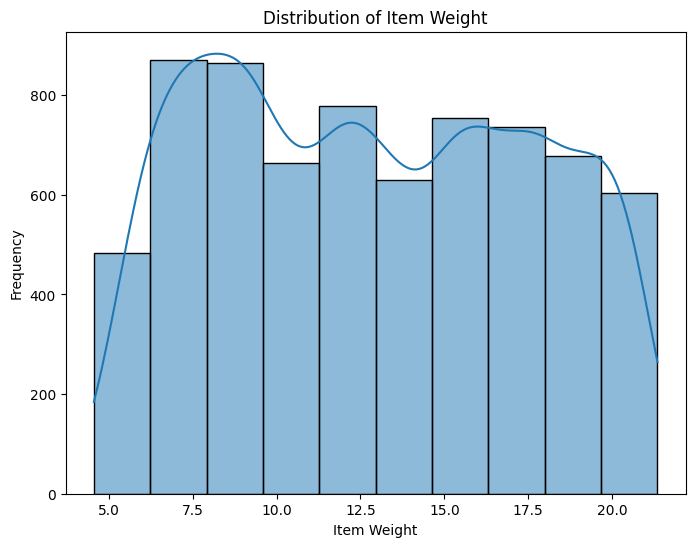

In [72]:
# Visualize the distribution of Item_Weight
plt.figure(figsize=(8, 6))
sns.histplot(train_df['Item_Weight'], bins=10, kde=True)
plt.title('Distribution of Item Weight')
plt.xlabel('Item Weight')
plt.ylabel('Frequency')
plt.show()

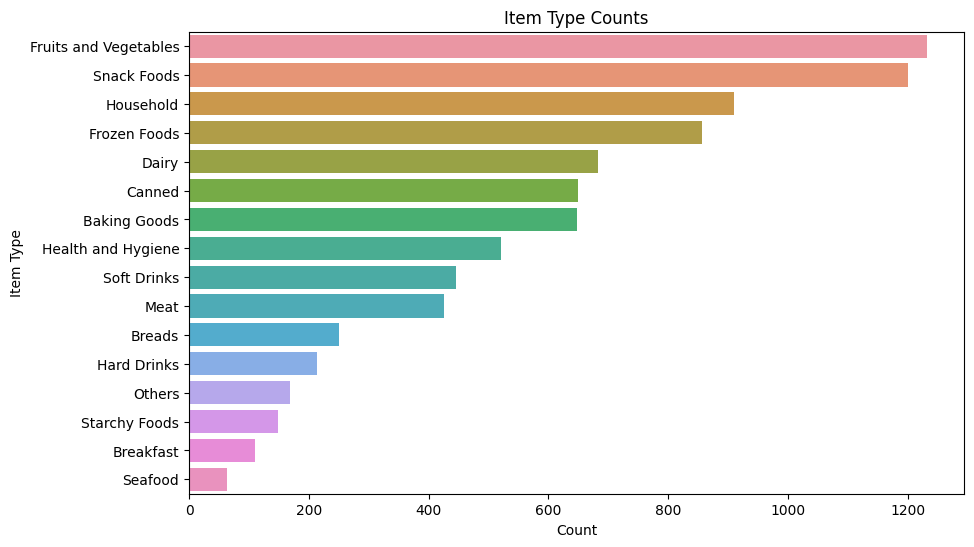

In [73]:
# Visualize the counts of different Item_Type

plt.figure(figsize=(10, 6))
sns.countplot(y='Item_Type', data=train_df, order=train_df['Item_Type'].value_counts().index)
plt.title('Item Type Counts')
plt.xlabel('Count')
plt.ylabel('Item Type')
plt.show()

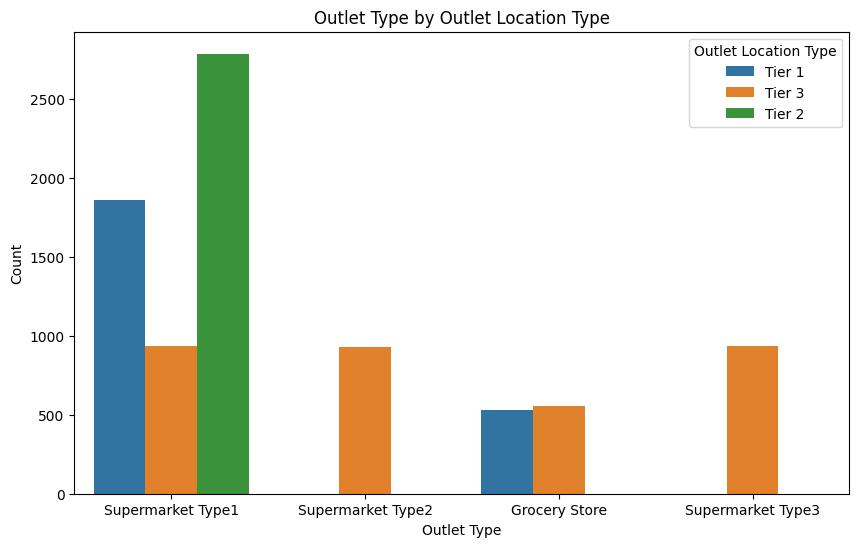

In [74]:
# Visualize the relationship between Outlet_Type and Outlet_Location_Type
plt.figure(figsize=(10, 6))
sns.countplot(x='Outlet_Type', hue='Outlet_Location_Type', data=train_df)
plt.title('Outlet Type by Outlet Location Type')
plt.xlabel('Outlet Type')
plt.ylabel('Count')
plt.legend(title='Outlet Location Type')
plt.show()

<h1> # Univariate Analysis of 'Item_MRP'.

In [75]:
train_df['Item_MRP'].describe()

count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64

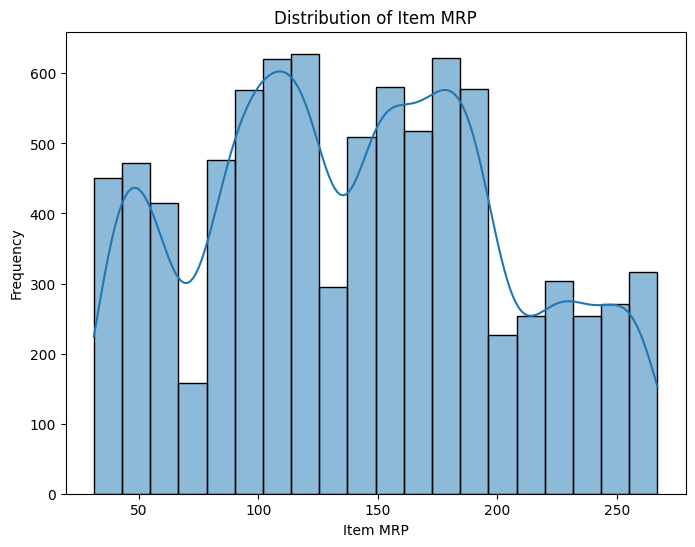

In [76]:
plt.figure(figsize=(8, 6))
sns.histplot(train_df['Item_MRP'], bins=20, kde=True)
plt.title('Distribution of Item MRP')
plt.xlabel('Item MRP')
plt.ylabel('Frequency')
plt.show()

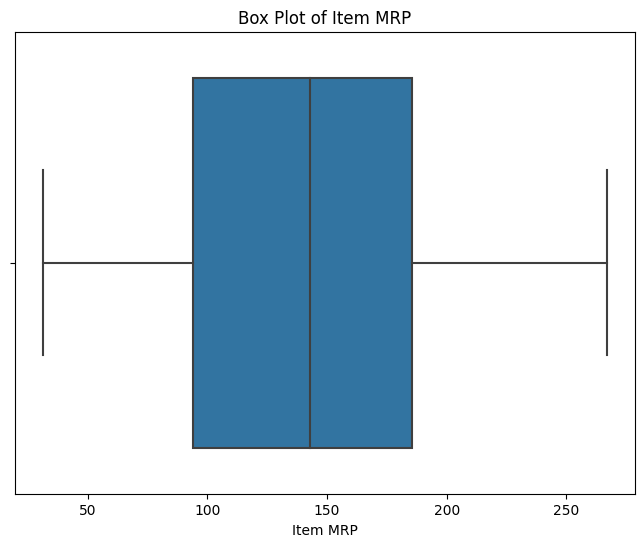

In [77]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=train_df['Item_MRP'])
plt.title('Box Plot of Item MRP')
plt.xlabel('Item MRP')
plt.show()

<h1> # Bivariate Analysis

In [78]:
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


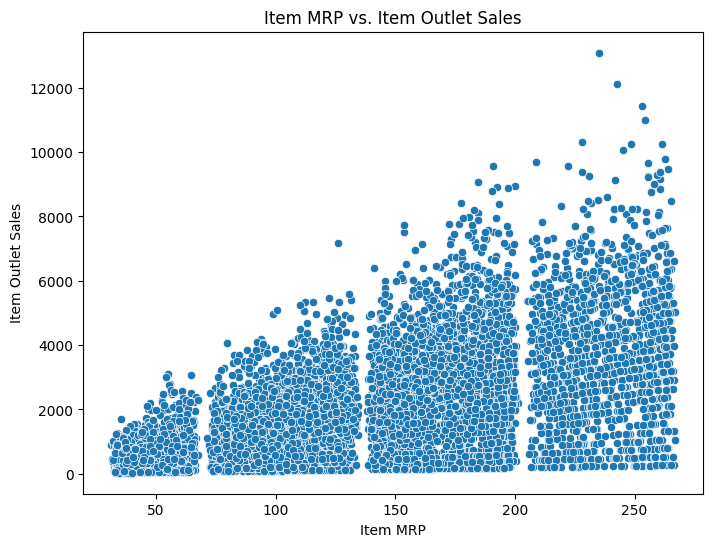

In [79]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data=train_df)
plt.title('Item MRP vs. Item Outlet Sales')
plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales')
plt.show()

<h1> # Missing Value Treatment

In [80]:
# the number of messing values in test dataset
train_df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [81]:
train_df.dtypes 

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

 -> We observe that the 'Item_Weight' is a numerical feature, and in this context, we can address the missing values by replacing them with the mean of this column.

In [82]:
mean_weight = train_df['Item_Weight'].mean()

train_df['Item_Weight'].fillna(mean_weight, inplace=True)

Regarding the 'Outlet_Size', we can create a new dataset containing outlet information ('Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type') to explore potential patterns and relationships that could help us find an effective approach to fill in the missing values.

In [83]:
df = train_df[['Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']]

In [84]:
df.head()

,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,OUT049,Medium,Tier 1,Supermarket Type1
1,OUT018,Medium,Tier 3,Supermarket Type2
2,OUT049,Medium,Tier 1,Supermarket Type1
3,OUT010,NaN,Tier 3,Grocery Store
4,OUT013,High,Tier 3,Supermarket Type1


In [85]:
df['Outlet_Identifier'].unique() # We have 10 different outlets.

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [86]:
df[df['Outlet_Identifier'] == 'OUT019'].isnull().sum()

Outlet_Identifier       0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
dtype: int64

Using df[df['Outlet_Identifier'] == '#######'].isnull().sum(), we discovered that only 3 outlets have missing values in the 'Outlet_Size' :

-> OUT045 <br>
-> OUT017 <br>
-> OUT010

In [87]:
df[df['Outlet_Identifier'] == 'OUT035'].head()

,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
19,OUT035,Small,Tier 2,Supermarket Type1
22,OUT035,Small,Tier 2,Supermarket Type1
26,OUT035,Small,Tier 2,Supermarket Type1
66,OUT035,Small,Tier 2,Supermarket Type1
86,OUT035,Small,Tier 2,Supermarket Type1


In [88]:
df[df['Outlet_Identifier'] == 'OUT045'].head()

,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
8,OUT045,NaN,Tier 2,Supermarket Type1
33,OUT045,NaN,Tier 2,Supermarket Type1
46,OUT045,NaN,Tier 2,Supermarket Type1
47,OUT045,NaN,Tier 2,Supermarket Type1
56,OUT045,NaN,Tier 2,Supermarket Type1


-> Upon observation, we notice that the outlets with the identifiers OUT035 and OUT045 share the same 'Outlet_Type' and 'Outlet_Location_Type.' Thus, we can infer that we have the option to replace the missing 'Outlet_Size' value in OUT045 with the 'Outlet_Size' value from OUT035.

In [89]:
size1 = train_df[train_df['Outlet_Identifier'] == 'OUT035']['Outlet_Size'].mode()[0]

In [90]:
train_df.loc[train_df['Outlet_Identifier'] == 'OUT045', 'Outlet_Size'] = train_df.loc[train_df['Outlet_Identifier'] == 'OUT045', 'Outlet_Size'].fillna(size1)

In [91]:
train_df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1481
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

-> As for the remaining cases, where we don't find commonalities in both characteristics, I have opted to utilize only the 'Outlet_Type' to fill in the missing values.

->> OUT010 with OUT019 <br>
->> OUT017 with OUT046

In [92]:
df[df['Outlet_Identifier'] == 'OUT010'].head()

,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
3,OUT010,NaN,Tier 3,Grocery Store
28,OUT010,NaN,Tier 3,Grocery Store
30,OUT010,NaN,Tier 3,Grocery Store
45,OUT010,NaN,Tier 3,Grocery Store
65,OUT010,NaN,Tier 3,Grocery Store


In [93]:
df[df['Outlet_Identifier'] == 'OUT019'].head()

,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
23,OUT019,Small,Tier 1,Grocery Store
29,OUT019,Small,Tier 1,Grocery Store
49,OUT019,Small,Tier 1,Grocery Store
59,OUT019,Small,Tier 1,Grocery Store
63,OUT019,Small,Tier 1,Grocery Store


In [94]:
size2 = train_df[train_df['Outlet_Identifier'] == 'OUT019']['Outlet_Size'].mode()[0]

In [95]:
train_df.loc[train_df['Outlet_Identifier'] == 'OUT010', 'Outlet_Size'] =train_df.loc[train_df['Outlet_Identifier'] == 'OUT010', 'Outlet_Size'].fillna(size2)

In [96]:
size3 = train_df[train_df['Outlet_Identifier'] == 'OUT046']['Outlet_Size'].mode()[0]

In [97]:
train_df.loc[train_df['Outlet_Identifier'] == 'OUT017', 'Outlet_Size'] = train_df.loc[train_df['Outlet_Identifier'] == 'OUT017', 'Outlet_Size'].fillna(size3)

In [98]:
# now we don't have any missing value in our dataset.
train_df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

<h1> # Feature Engineering & Encoding Categorical Variables

In [99]:
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


->> Cleaning the 'Item_Fat_Content' designations, we are left with just 'Regular' and 'Low Fat'.

In [100]:
train_df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [101]:
train_df['Item_Fat_Content'].replace('reg', 'Regular', inplace=True)
train_df['Item_Fat_Content'].replace('low fat', 'Low Fat', inplace=True)
train_df['Item_Fat_Content'].replace('LF', 'Low Fat', inplace=True)

<h3>->> One-Hot Encoding for Item_Fat_Content

In [102]:
encoded_fat_content = pd.get_dummies(train_df['Item_Fat_Content'], prefix='Item_Fat')
train_df = pd.concat([train_df, encoded_fat_content], axis=1)

In [103]:
train_df = train_df.drop(columns=['Item_Fat_Content'])

<h3>->> One-Hot Encoding for Item_Type

In [104]:
encoded_Item_Type = pd.get_dummies(train_df['Item_Type'], prefix='Item_Type')
train_df = pd.concat([train_df, encoded_Item_Type], axis=1)

In [105]:
train_df = train_df.drop(columns=['Item_Type'])

<h3>->> One-Hot Encoding for Outlet_Size

In [106]:
encoded_Outlet_Size = pd.get_dummies(train_df['Outlet_Size'], prefix='Outlet_Size')
train_df = pd.concat([train_df, encoded_Outlet_Size], axis=1)

In [107]:
train_df = train_df.drop(columns=['Outlet_Size'])

<h3>->> One-Hot Encoding for Outlet_Location_Type

In [108]:
encoded_Outlet_Location_Type = pd.get_dummies(train_df['Outlet_Location_Type'], prefix='Outlet_Location')
train_df = pd.concat([train_df, encoded_Outlet_Location_Type], axis=1)

In [109]:
train_df = train_df.drop(columns=['Outlet_Location_Type'])

<h3>->> One-Hot Encoding for Outlet_Type

In [110]:
encoded_Outlet_Type = pd.get_dummies(train_df['Outlet_Type'], prefix='Outlet_Type')
train_df = pd.concat([train_df, encoded_Outlet_Type], axis=1)

In [111]:
train_df = train_df.drop(columns=['Outlet_Type'])

<h3>->> One-Hot Encoding for Outlet_Identifier

In [112]:
#encoded_Outlet_Identifier = pd.get_dummies(train_df['Outlet_Identifier'], prefix='Outlet_Identifier')
#train_df = pd.concat([train_df, encoded_Outlet_Identifier], axis=1)

In [113]:
#train_df =train_df.drop(columns=['Outlet_Identifier'])

In [114]:
train_df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Low Fat,Item_Fat_Regular,Item_Type_Baking Goods,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Tier 1,Outlet_Location_Tier 2,Outlet_Location_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.30,0.016047,249.8092,OUT049,1999,3735.1380,True,False,False,...,False,True,False,True,False,False,False,True,False,False
1,DRC01,5.92,0.019278,48.2692,OUT018,2009,443.4228,False,True,False,...,False,True,False,False,False,True,False,False,True,False
2,FDN15,17.50,0.016760,141.6180,OUT049,1999,2097.2700,True,False,False,...,False,True,False,True,False,False,False,True,False,False
3,FDX07,19.20,0.000000,182.0950,OUT010,1998,732.3800,False,True,False,...,False,False,True,False,False,True,True,False,False,False
4,NCD19,8.93,0.000000,53.8614,OUT013,1987,994.7052,True,False,False,...,True,False,False,False,False,True,False,True,False,False


We noticed that there are a lot of 0 values in the 'Item_Visibility' column, so I decided to replace the 0 values with the mean of the 'Item_Visibility' column.

In [115]:
mean_Item_Visibility = train_df['Item_Visibility'].mean()
train_df['Item_Visibility'] = train_df['Item_Visibility'].replace(0.000000,mean_Item_Visibility)

In [116]:
train_df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Low Fat,Item_Fat_Regular,Item_Type_Baking Goods,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Tier 1,Outlet_Location_Tier 2,Outlet_Location_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.30,0.016047,249.8092,OUT049,1999,3735.1380,True,False,False,...,False,True,False,True,False,False,False,True,False,False
1,DRC01,5.92,0.019278,48.2692,OUT018,2009,443.4228,False,True,False,...,False,True,False,False,False,True,False,False,True,False
2,FDN15,17.50,0.016760,141.6180,OUT049,1999,2097.2700,True,False,False,...,False,True,False,True,False,False,False,True,False,False
3,FDX07,19.20,0.066132,182.0950,OUT010,1998,732.3800,False,True,False,...,False,False,True,False,False,True,True,False,False,False
4,NCD19,8.93,0.066132,53.8614,OUT013,1987,994.7052,True,False,False,...,True,False,False,False,False,True,False,True,False,False


<h1> # test_df cleaning

In [117]:
mean_weight = test_df['Item_Weight'].mean()
test_df['Item_Weight'].fillna(mean_weight, inplace=True)


size1 = test_df[test_df['Outlet_Identifier'] == 'OUT035']['Outlet_Size'].mode()[0]
test_df.loc[test_df['Outlet_Identifier'] == 'OUT045', 'Outlet_Size'] = test_df.loc[test_df['Outlet_Identifier'] == 'OUT045', 'Outlet_Size'].fillna(size1)

size2 = test_df[test_df['Outlet_Identifier'] == 'OUT019']['Outlet_Size'].mode()[0]
test_df.loc[test_df['Outlet_Identifier'] == 'OUT010', 'Outlet_Size'] =test_df.loc[test_df['Outlet_Identifier'] == 'OUT010', 'Outlet_Size'].fillna(size2)

size3 = test_df[test_df['Outlet_Identifier'] == 'OUT046']['Outlet_Size'].mode()[0]
test_df.loc[test_df['Outlet_Identifier'] == 'OUT017', 'Outlet_Size'] = test_df.loc[test_df['Outlet_Identifier'] == 'OUT017', 'Outlet_Size'].fillna(size3)

test_df['Item_Fat_Content'].replace('reg', 'Regular', inplace=True)
test_df['Item_Fat_Content'].replace('low fat', 'Low Fat', inplace=True)
test_df['Item_Fat_Content'].replace('LF', 'Low Fat', inplace=True)

encoded_fat_content = pd.get_dummies(test_df['Item_Fat_Content'], prefix='Item_Fat')
test_df = pd.concat([test_df, encoded_fat_content], axis=1)
test_df = test_df.drop(columns=['Item_Fat_Content'])

encoded_Item_Type = pd.get_dummies(test_df['Item_Type'], prefix='Item_Type')
test_df = pd.concat([test_df, encoded_Item_Type], axis=1)
test_df = test_df.drop(columns=['Item_Type'])

encoded_Outlet_Size = pd.get_dummies(test_df['Outlet_Size'], prefix='Outlet_Size')
test_df = pd.concat([test_df, encoded_Outlet_Size], axis=1)
test_df = test_df.drop(columns=['Outlet_Size'])

encoded_Outlet_Location_Type = pd.get_dummies(test_df['Outlet_Location_Type'], prefix='Outlet_Location')
test_df = pd.concat([test_df, encoded_Outlet_Location_Type], axis=1)
test_df = test_df.drop(columns=['Outlet_Location_Type'])

encoded_Outlet_Type = pd.get_dummies(test_df['Outlet_Type'], prefix='Outlet_Type')
test_df = pd.concat([test_df, encoded_Outlet_Type], axis=1)
test_df = test_df.drop(columns=['Outlet_Type'])

mean_Item_Visibility = test_df['Item_Visibility'].mean()
test_df['Item_Visibility'] = test_df['Item_Visibility'].replace(0.000000,mean_Item_Visibility)

#encoded_Outlet_Identifier = pd.get_dummies(test_df['Outlet_Identifier'], prefix='Outlet_Identifier')
#test_df = pd.concat([test_df, encoded_Outlet_Identifier], axis=1)
#test_df =test_df.drop(columns=['Outlet_Identifier'])

<h1> # normalize DataFrame

In [118]:
from sklearn.preprocessing import MinMaxScaler

numeric_columns = train_df.columns.difference(['Item_Identifier', 'Outlet_Identifier'])

scaler = MinMaxScaler(feature_range=(0, 1))

train_df[numeric_columns] = scaler.fit_transform(train_df[numeric_columns])

<h1> # Linear Regression

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = train_df.drop(columns=['Item_Outlet_Sales', 'Item_Identifier', 'Outlet_Identifier'])
y = train_df['Item_Outlet_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linear_reg = LinearRegression()

linear_reg.fit(X_train, y_train)
predictions = linear_reg.predict(X_test)

rmse = mean_squared_error(y_test, predictions, squared=False)

print("Linear Regression RMSE:", rmse)


Linear Regression RMSE: 0.08196945695602507


<h1> # RandomForest

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

X = train_df.drop(columns=['Item_Outlet_Sales', 'Item_Identifier', 'Outlet_Identifier'])
y = train_df['Item_Outlet_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)

random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)
rmse = mean_squared_error(y_test, predictions, squared=False)

print("Random Forest RMSE:", rmse)


Random Forest RMSE: 0.08392080981082137


<h1> # XGBoost

In [121]:
# %pip install xgboost

In [122]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = train_df.drop(columns=['Item_Outlet_Sales', 'Item_Identifier', 'Outlet_Identifier'])
y = train_df['Item_Outlet_Sales']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
xgb_reg = xgb.XGBRegressor(n_estimators=100, random_state=42)  

xgb_reg.fit(X_train, y_train)
predictions = xgb_reg.predict(X_test)

rmse = mean_squared_error(y_test, predictions, squared=False)

print("XGBoost RMSE:", rmse)


XGBoost RMSE: 0.08437937964991728


->> Here, we employ linear regression to predict 'Item_Outlet_Sales' for the test dataset because the root mean squared error (RMSE) of linear regression is the lowest compared to the RMSE values of XGBoost and Random Forest.

In [123]:
test_df['Item_Outlet_Sales'] = linear_reg.predict(test_df.drop(columns=['Item_Identifier', 'Outlet_Identifier']))

In [124]:
test_df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Fat_Low Fat,Item_Fat_Regular,Item_Type_Baking Goods,Item_Type_Breads,...,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Tier 1,Outlet_Location_Tier 2,Outlet_Location_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Outlet_Sales
0,FDW58,20.750000,0.007565,107.8622,OUT049,1999,True,False,False,False,...,True,False,True,False,False,False,True,False,False,112.947231
1,FDW14,8.300000,0.038428,87.3198,OUT017,2007,False,True,False,False,...,False,True,False,True,False,False,True,False,False,107.481632
2,NCN55,14.600000,0.099575,241.7538,OUT010,1998,True,False,False,False,...,False,True,False,False,True,True,False,False,False,150.621799
3,FDQ58,7.315000,0.015388,155.0340,OUT017,2007,True,False,False,False,...,False,True,False,True,False,False,True,False,False,126.633549
4,FDY38,12.695633,0.118599,234.2300,OUT027,1985,False,True,False,False,...,True,False,False,False,True,False,False,False,True,148.242424
